In [6]:
from scipy.special import sph_harm as Y 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
sns.set_context("paper")

In [7]:
ntheta,nphi = 200,100
theta,phi = np.linspace(0,2*np.pi,ntheta),np.linspace(0,np.pi,nphi)
theta,phi = np.meshgrid(theta,phi) 

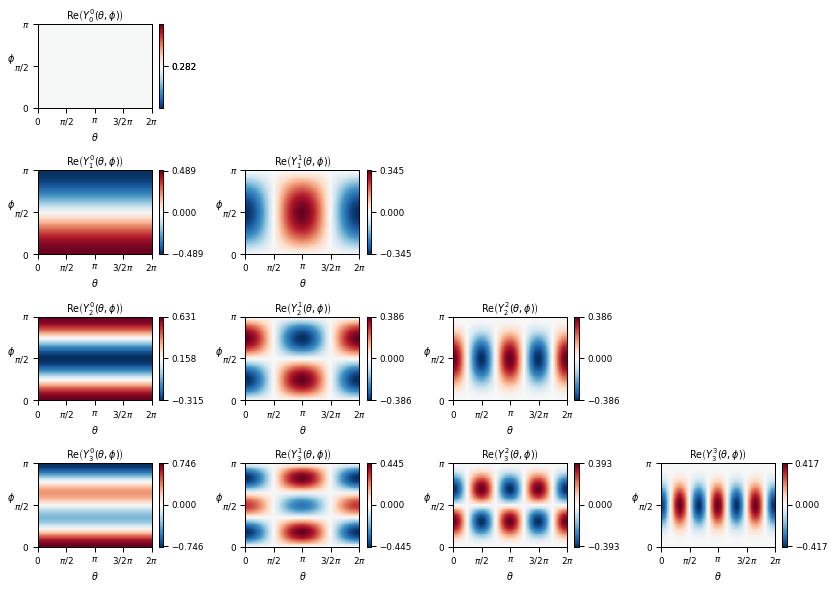

In [28]:
nmax = 4
scale = 0.6
fig, axs = plt.subplots(1*nmax,1*nmax,
                        figsize=(11.69,8.27)) # 
                        #figsize=(20*nmax*scale,15*nmax*scale))
for n in range(nmax):
    for m in range(n+1,nmax):
        axs[n,m].axis('off')
    for m in range(n+1):
        ax = axs[n,m]
        z = np.real(Y(m,n,theta,phi))

        # Colorbar
        levels = MaxNLocator(nbins=300).tick_values(z.min(), z.max())
        cmap = plt.get_cmap('RdBu_r')
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

        im = ax.pcolormesh(z,cmap=cmap, norm=norm)
        
        if n==0 and m==0:
            cbar = fig.colorbar(im, ax=ax,ticks = [z.min(),z.max()])

        else:
            mid = (z.min()+z.max())/2
            cbar = fig.colorbar(im, ax=ax,ticks = [np.round(z.min(),3),np.round(mid,3),np.round(z.max(),3)])

        # Labels
        ax.set_xticks([0,50,100,150,200])
        ax.set_xticklabels([r"$0$",r"$\pi/2$", r"$\pi$",r"$3/2\pi$",r"$2\pi$"])
        ax.set_xlabel(r"$\theta$")
        ax.set_yticks([0,50,100])
        ax.set_yticklabels([r"$0$",r"$\pi/2$",r"$\pi$"])
        ax.set_ylabel(r"$\phi$",rotation = 0,labelpad = 3)

        ax.set_title(r'Re$\left(Y_{}^{}(\theta,\phi)\right)$'.format(n,m), pad= 5)
plt.tight_layout()
plt.savefig("sphericalharmonics.png",dpi = 400)